In [73]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pmdarima as pm

import functions as fn

In [74]:
district = "Warangal"
df = pd.read_csv("data/temp.csv")
df = df.loc[df["district"]==district]
df.head()

,Unnamed: 0,district,odate,rainfall,temp_min,temp_max,avg_temp,max_temp_pred,avg_temp_pred,temp_range,heatwave_pred
6932,6932,Warangal,2021-10-01,0.000000,24.807692,33.653846,29.230769,33.653826,29.230764,4.423062,True
6933,6933,Warangal,2021-10-02,0.030769,24.561538,34.261538,29.411538,34.143221,29.390905,4.752316,True
6934,6934,Warangal,2021-10-03,0.000000,25.284615,34.215385,29.750000,34.134343,29.671635,4.462708,True
6935,6935,Warangal,2021-10-04,2.469231,24.946154,34.038462,29.492308,34.017206,29.435154,4.582052,True
6936,6936,Warangal,2021-10-05,0.092308,24.530769,33.769231,29.150000,33.820342,29.191758,4.628584,True


<Axes: xlabel='odate'>

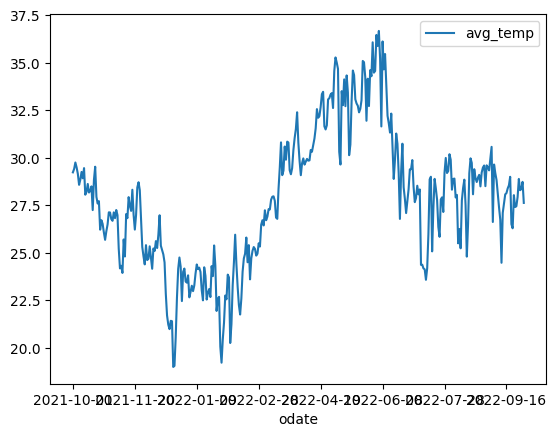

In [75]:
df.set_index("odate", inplace=True)
df.plot(y='avg_temp')

In [76]:
holt_winter = sm.tsa.ExponentialSmoothing(
    df['avg_temp'], seasonal='add', seasonal_periods=365)
x = holt_winter.fit(remove_bias=True)
x.params


/home/rohan/dev/telangana-ai/4b349f59-e65b-4968-b72e-bf2fb6c13d07/venv/lib64/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.

In [ ]:
df.head()

,Unnamed: 0,district,rainfall,temp_min,temp_max,avg_temp,max_temp_pred,avg_temp_pred,temp_range,heatwave_pred
odate,,,,,,,,,,
2018-01-01,5199,Karimnagar,0.0,14.716,31.884,23.300,32.076826,23.569465,8.507361,True
2018-01-02,5200,Karimnagar,0.0,14.464,31.880,23.172,32.049634,23.438041,8.611593,True
2018-01-03,5201,Karimnagar,0.0,14.268,31.088,22.678,31.409669,22.979505,8.430164,True
2018-01-04,5202,Karimnagar,0.0,13.484,30.908,22.196,31.279664,22.588920,8.690744,True
2018-01-05,5203,Karimnagar,0.0,13.012,29.748,21.380,30.360450,21.892188,8.468261,True


In [ ]:
df.tail()

,Unnamed: 0,district,rainfall,temp_min,temp_max,avg_temp,max_temp_pred,avg_temp_pred,temp_range,heatwave_pred
odate,,,,,,,,,,
2022-09-26,6927,Karimnagar,0.00000,23.71250,33.46875,28.590625,33.061831,28.322557,4.739274,True
2022-09-27,6928,Karimnagar,3.58125,23.91875,33.58125,28.750000,33.220201,28.615669,4.604533,True
2022-09-28,6929,Karimnagar,0.00000,24.60000,32.45625,28.528125,32.481506,28.308939,4.172568,True
2022-09-29,6930,Karimnagar,3.43125,23.95000,33.43750,28.693750,33.291416,28.633686,4.657731,True
2022-09-30,6931,Karimnagar,2.20000,22.97500,32.53125,27.753125,32.581533,27.736710,4.844823,True


/home/rohan/dev/telangana-ai/4b349f59-e65b-4968-b72e-bf2fb6c13d07/venv/lib64/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='odate'>

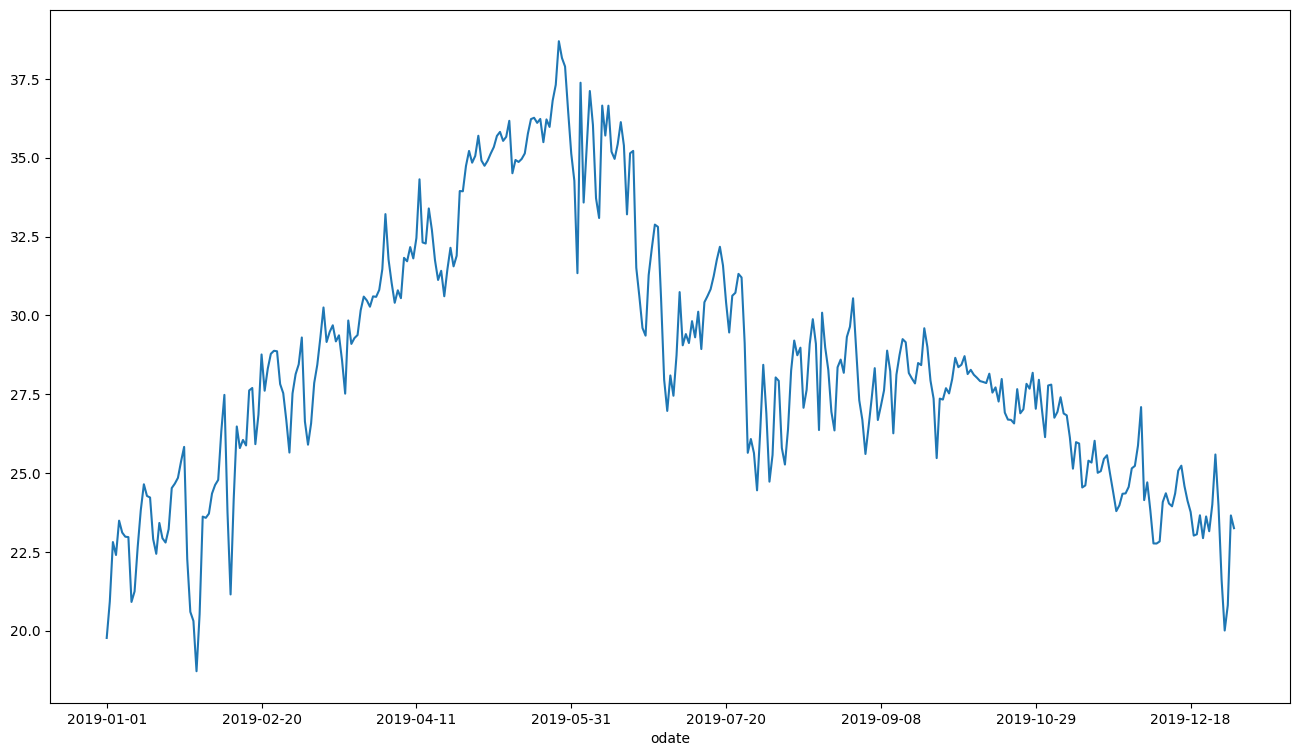

In [ ]:
df['predict_holt'] = list(x.predict(1, len(df)))
# df[['aqi', 'predict_holt']].plot()
df["avg_temp"][365:730].plot(figsize=(16, 9))

/home/rohan/dev/telangana-ai/4b349f59-e65b-4968-b72e-bf2fb6c13d07/venv/lib64/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

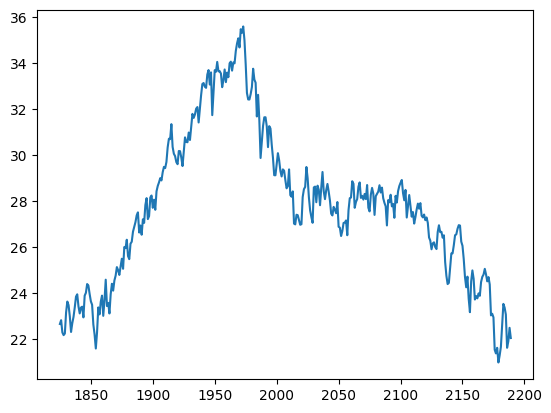

In [ ]:
x.forecast(92+365)[92:].plot()

In [ ]:
from pathlib import Path
save_location = Path("..", "pickles", f"temp-{district}")
x.save(fname=save_location.absolute())